#### importing the required libraries 

In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from keras.regularizers import L1,L2 

#### importing the dataset 

In [23]:
df=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\Multiple CSV\Multiple CSV\7.xor.csv",header=None)
df.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [24]:
#renaming columns properly
df.columns=["feature_1","feature_2","label"] 
df.head() 

,feature_1,feature_2,label
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [26]:
df["label"]=np.where(df["label"]==-1.0,0,1)
df.head() 

,feature_1,feature_2,label
0,1.764052,0.400157,0
1,0.978738,2.240893,0
2,1.867558,-0.977278,1
3,0.950088,-0.151357,1
4,-0.103219,0.410599,1


<Axes: >

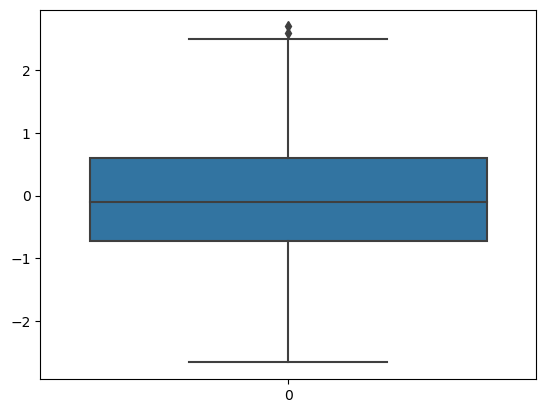

In [27]:
sns.boxplot(df["feature_1"]) 

<Axes: >

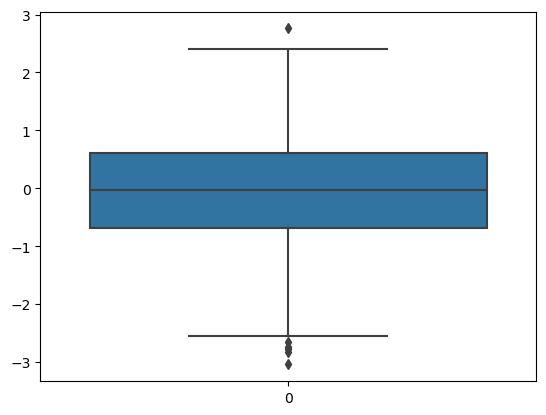

In [28]:
sns.boxplot(df["feature_2"])

<Axes: xlabel='feature_1', ylabel='feature_2'>

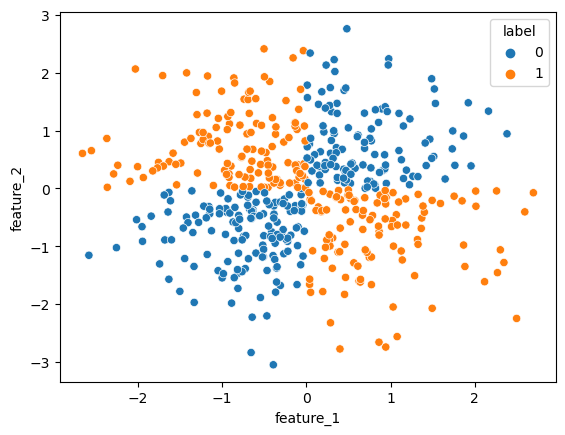

In [29]:
sns.scatterplot(data=df,x="feature_1",y="feature_2",hue="label") 

#### checking label counts 

In [30]:
df["label"].value_counts()

label
0    260
1    240
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  500 non-null    float64
 1   feature_2  500 non-null    float64
 2   label      500 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 9.9 KB


#### splitting the data into input and output features as x and y 

In [32]:
## splitting the data into input and output
x=df[["feature_1","feature_2"]]

## typecasting label column as int 
y=df["label"].astype(int)

In [33]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: label, dtype: int32

#### splitting the data into train and test 

In [34]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(450, 2) (450,)
(50, 2) (50,)


#### scaling the input features of both X_train,X_test 

In [35]:
scalar=StandardScaler()

### scaling X_train
X_train=scalar.fit_transform(X_train)



## scaling X_test 
X_test=scalar.transform(X_test)

#### building the logical structure 

In [36]:
model=Sequential()
model.add(Dense(22,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(18,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 22)                66        
                                                                 
 dense_5 (Dense)             (None, 20)                460       
                                                                 
 dense_6 (Dense)             (None, 18)                378       
                                                                 
 dense_7 (Dense)             (None, 1)                 19        
                                                                 
Total params: 923 (3.61 KB)
Trainable params: 923 (3.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### compiling the model 

In [38]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.1),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=10,epochs=20,validation_split=0.1)

Epoch 1/20
41/41 [==============================] - 2s 13ms/step - loss: 0.6805 - accuracy: 0.7037 - val_loss: 0.6022 - val_accuracy: 0.8667
Epoch 2/20
41/41 [==============================] - 0s 5ms/step - loss: 0.5127 - accuracy: 0.9333 - val_loss: 0.4261 - val_accuracy: 0.8667
Epoch 3/20
41/41 [==============================] - 0s 4ms/step - loss: 0.3253 - accuracy: 0.9383 - val_loss: 0.3863 - val_accuracy: 0.8444
Epoch 4/20
41/41 [==============================] - 0s 4ms/step - loss: 0.2412 - accuracy: 0.9432 - val_loss: 0.2310 - val_accuracy: 0.9556
Epoch 5/20
41/41 [==============================] - 0s 4ms/step - loss: 0.2064 - accuracy: 0.9556 - val_loss: 0.2138 - val_accuracy: 0.9333
Epoch 6/20
41/41 [==============================] - 0s 4ms/step - loss: 0.1781 - accuracy: 0.9679 - val_loss: 0.2381 - val_accuracy: 0.9111
Epoch 7/20
41/41 [==============================] - 0s 4ms/step - loss: 0.1797 - accuracy: 0.9580 - val_loss: 0.2293 - val_accuracy: 0.9111
Epoch 8/20
41/41 [=

#### plotting the train test loss 

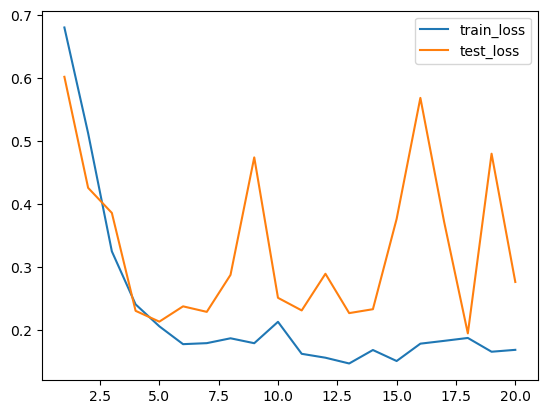

In [39]:
plt.plot(range(1,21),history.history["loss"],label="train_loss")
plt.plot(range(1,21),history.history["val_loss"],label="test_loss") 
plt.legend() 

#### finding the predicted values using model 

In [40]:
predicted=model.predict(X_test)
predicted

2/2 [==============================] - 0s 5ms/step


array([[1.9071450e-02],
       [6.5917475e-04],
       [9.8983806e-01],
       [1.5027267e-04],
       [9.1376386e-08],
       [3.4066525e-09],
       [7.6857531e-03],
       [5.6182284e-02],
       [1.8127199e-04],
       [9.9995780e-01],
       [1.7183851e-07],
       [5.9793578e-03],
       [1.7064165e-01],
       [8.9394678e-05],
       [9.5879368e-02],
       [9.9999809e-01],
       [9.9999040e-01],
       [5.3152919e-01],
       [9.7120792e-01],
       [3.0742785e-01],
       [3.8201327e-07],
       [9.9967730e-01],
       [9.9936724e-01],
       [1.1998867e-04],
       [9.9999976e-01],
       [1.8374918e-09],
       [9.9187171e-01],
       [9.9883044e-01],
       [4.4281496e-05],
       [7.5813876e-03],
       [1.2551745e-02],
       [9.9731845e-01],
       [1.6254674e-01],
       [2.7850025e-10],
       [9.8891443e-01],
       [9.4600159e-01],
       [4.9639320e-06],
       [9.9976438e-01],
       [9.9999744e-01],
       [1.9680893e-03],
       [5.0410247e-01],
       [9.984212



#### converting the predicted probablities to the respective labels

In [42]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1]])

#### evaluating the model 

0.98


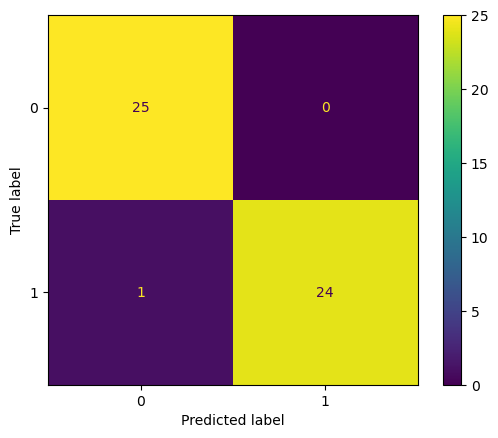

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### creating the decision surface 

In [44]:
from mlxtend.plotting  import plot_decision_regions


9600/9600 [==============================] - 20s 2ms/step


<Axes: >

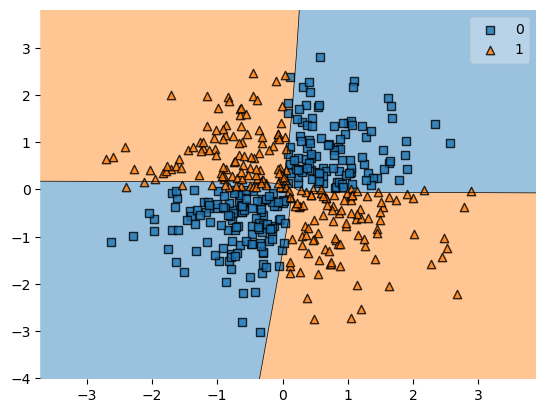

In [45]:
plot_decision_regions(X_train,y_train.values,clf=model)

9600/9600 [==============================] - 20s 2ms/step


<Axes: >

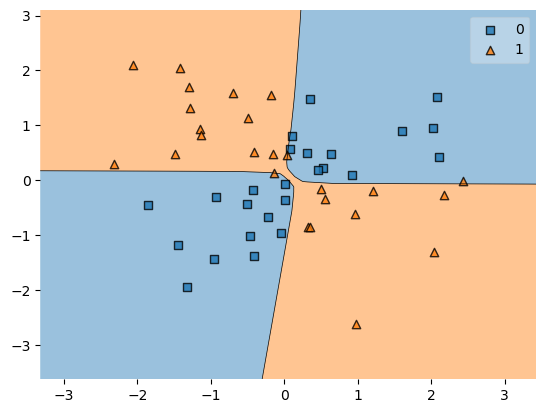

In [46]:
#for test data 
plot_decision_regions(X_test,y_test.values,clf=model)

#### Model Summary 


- This neural network model is showing accuracy of 98 percent
- We have used 3 hidden layers.
- In the First Hidden layers we have used 22 neurons,activation function as relu and kernel and bias regularizer L2 as 0.001.
- In the second hidden layers we have used 20 neurons,activation function as relu and kernel and bias regularizer L2 as 0.001.
- In the third hidden layers we have used 18 neurons,activation function as relu and kernel and bias regularizer L2 as 0.001.
- In the output layer we have used sigmoid as the activation function. 
- For compiling the model we haved loss as binary cross entropy,optimizer as SGD with batch size of 10 with learning rate of 0.1. 
- No of epochs used for training this model is 20. 
